# Import libs

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Read the data

In [2]:
data = pd.read_csv('taxi_trip_pricing.csv')
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df = data.copy()
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# Basic analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.shape

(1000, 11)

### Check the anomalies

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Trip_Distance_km
[ 19.35        47.59        36.87        30.33                nan
   8.64         3.85        43.44        30.45        35.7
  48.53        41.79        11.4          9.91         9.99
  15.91        26.71        22.17        15.27        30.98
   7.84       105.94355004  18.95        23.35        39.47
  10.78       138.09832791  30.03         3.28        30.77
   9.36         4.19        47.5         48.32        40.61
  15.93         5.79        34.53        22.57         6.98
  25.26         2.69        45.56        13.68        33.46
  16.27        26.48        27.79        10.06        48.51
  38.98        47.04        44.85        30.3         46.17
   5.34        10.6          3.22        16.94        20.05
  14.3         41.61        18.48       146.06704716  27.59
   7.91        40.31         4.65        49.36        38.84
  10.74         1.27        40.96        35.64        36.72
  38.79         4.63        18.56         6.68        43.29
  31.54        17.

### Check duplicate rows

In [7]:
df[df.duplicated()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price


### Missing value treatment

In [8]:
df.isnull().sum()/len(df)*100

Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64

In [9]:
df[df.isnull().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


In [10]:
df.size

11000

In [11]:
df.isnull().sum().sum()/df.size*100

4.990909090909091

### Seperating the num and cat columns

In [12]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include=object).columns.to_list()

### Understanding the num and cat columns

In [13]:
df[num].describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [14]:
df[num].skew()

Trip_Distance_km         2.236010
Passenger_Count          0.016255
Base_Fare               -0.005149
Per_Km_Rate              0.079206
Per_Minute_Rate          0.058695
Trip_Duration_Minutes    0.017749
Trip_Price               3.732561
dtype: float64

In [15]:
df[num].agg(['mean','median']).T

,mean,median
Trip_Distance_km,27.070547,25.8300
Passenger_Count,2.476842,2.0000
Base_Fare,3.502989,3.5200
Per_Km_Rate,1.233316,1.2200
Per_Minute_Rate,0.292916,0.2900
Trip_Duration_Minutes,62.118116,61.8600
Trip_Price,56.874773,50.0745


In [16]:
df[df['Trip_Price'].isnull()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
11,48.53,Night,Weekday,3.0,Low,Clear,4.78,NaN,0.50,79.94,NaN
32,4.19,Morning,Weekday,1.0,Low,Clear,4.07,1.89,0.19,69.06,NaN
94,38.78,Morning,Weekday,3.0,Medium,Clear,3.08,1.62,0.15,90.14,NaN
109,4.77,Morning,Weekend,2.0,High,Clear,NaN,0.96,0.18,105.91,NaN
122,16.58,Evening,NaN,2.0,Low,Clear,4.46,1.23,0.16,62.79,NaN
167,10.14,Afternoon,Weekday,4.0,Low,Rain,4.50,1.62,0.38,25.41,NaN
177,19.95,Morning,Weekday,3.0,Low,NaN,2.50,0.88,0.49,NaN,NaN
178,46.90,Evening,Weekday,1.0,High,Clear,4.14,1.33,0.13,66.38,NaN


In [17]:
### dropping the records where trip price is null

In [18]:
df.dropna(subset=['Trip_Price'],inplace = True)

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              49
Day_of_Week              46
Passenger_Count          48
Traffic_Conditions       50
Weather                  46
Base_Fare                44
Per_Km_Rate              44
Per_Minute_Rate          49
Trip_Duration_Minutes    46
Trip_Price                0
dtype: int64

In [21]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

Time_of_Day
['Morning' 'Evening' 'Afternoon' 'Night' nan]

Day_of_Week
['Weekday' 'Weekend' nan]

Traffic_Conditions
['Low' 'High' 'Medium' nan]

Weather
['Clear' nan 'Rain' 'Snow']



In [22]:
# Check the dependencies of all cat vs cat

In [23]:
from scipy import stats

In [24]:
for i in cat:
    for j in cat:
        if i !=j :

            obs = pd.crosstab(df[i],df[j])

            chistats, pval, dof, exp = stats.chi2_contingency(obs)

            if pval > 0.05:
                print(f'Both {i} and {j} are independent')
            else:
                print(f'Both {i} and {j} are dependent')
    print('************')
            
            

Both Time_of_Day and Day_of_Week are independent
Both Time_of_Day and Traffic_Conditions are independent
Both Time_of_Day and Weather are independent
************
Both Day_of_Week and Time_of_Day are independent
Both Day_of_Week and Traffic_Conditions are independent
Both Day_of_Week and Weather are independent
************
Both Traffic_Conditions and Time_of_Day are independent
Both Traffic_Conditions and Day_of_Week are independent
Both Traffic_Conditions and Weather are independent
************
Both Weather and Time_of_Day are independent
Both Weather and Day_of_Week are independent
Both Weather and Traffic_Conditions are independent
************


In [25]:
# Imputing with median for num and mode for cat

In [26]:
for i in cat:
    df[i] = df[i].fillna(df[i].mode()[0])

In [27]:
df[cat].isnull().sum()

Time_of_Day           0
Day_of_Week           0
Traffic_Conditions    0
Weather               0
dtype: int64

In [28]:
for i in num:
    df[i] = df[i].fillna(df[i].median())

In [29]:
df[num].isnull().sum()

Trip_Distance_km         0
Passenger_Count          0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

## Understanding the target column 

In [30]:
df[['Trip_Price']].describe()

,Trip_Price
count,951.000000
mean,56.874773
std,40.469791
min,6.126900
25%,33.742650
50%,50.074500
75%,69.099350
max,332.043689


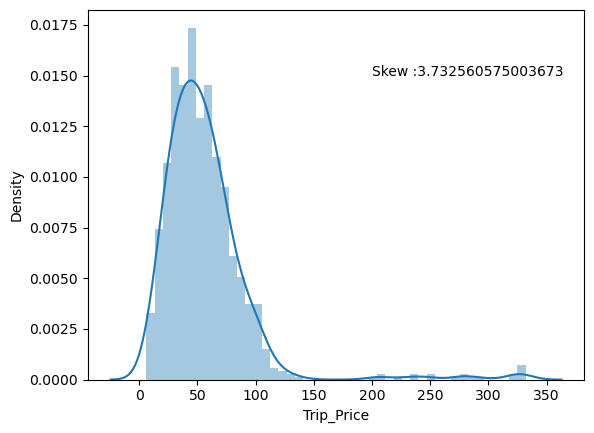

In [31]:
sns.distplot(df['Trip_Price'])

plt.text(x=200, y = 0.0150, s='Skew :'+str(df['Trip_Price'].skew()))
plt.show()

# Univairiate Analysis

In [32]:
plt.rcParams['figure.figsize']=[20,10]

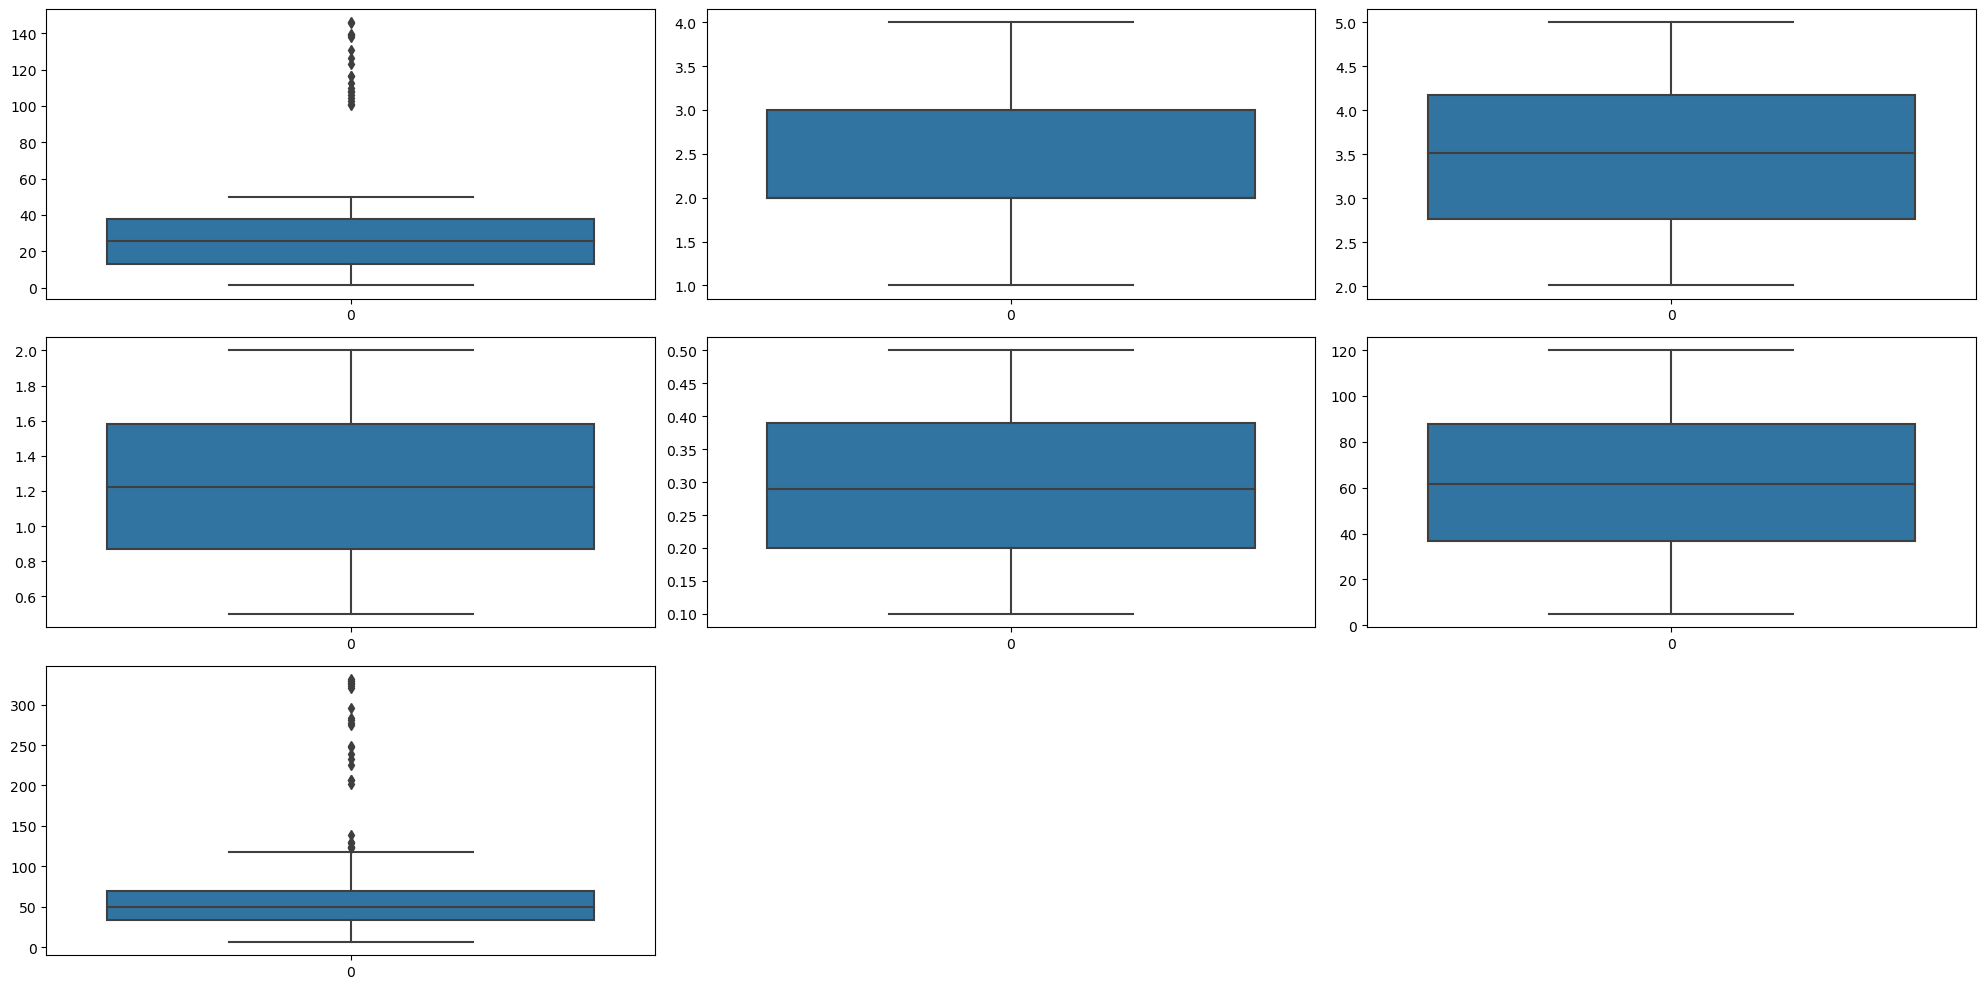

In [33]:
t=1
for i in num:
    plt.subplot(3,3,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

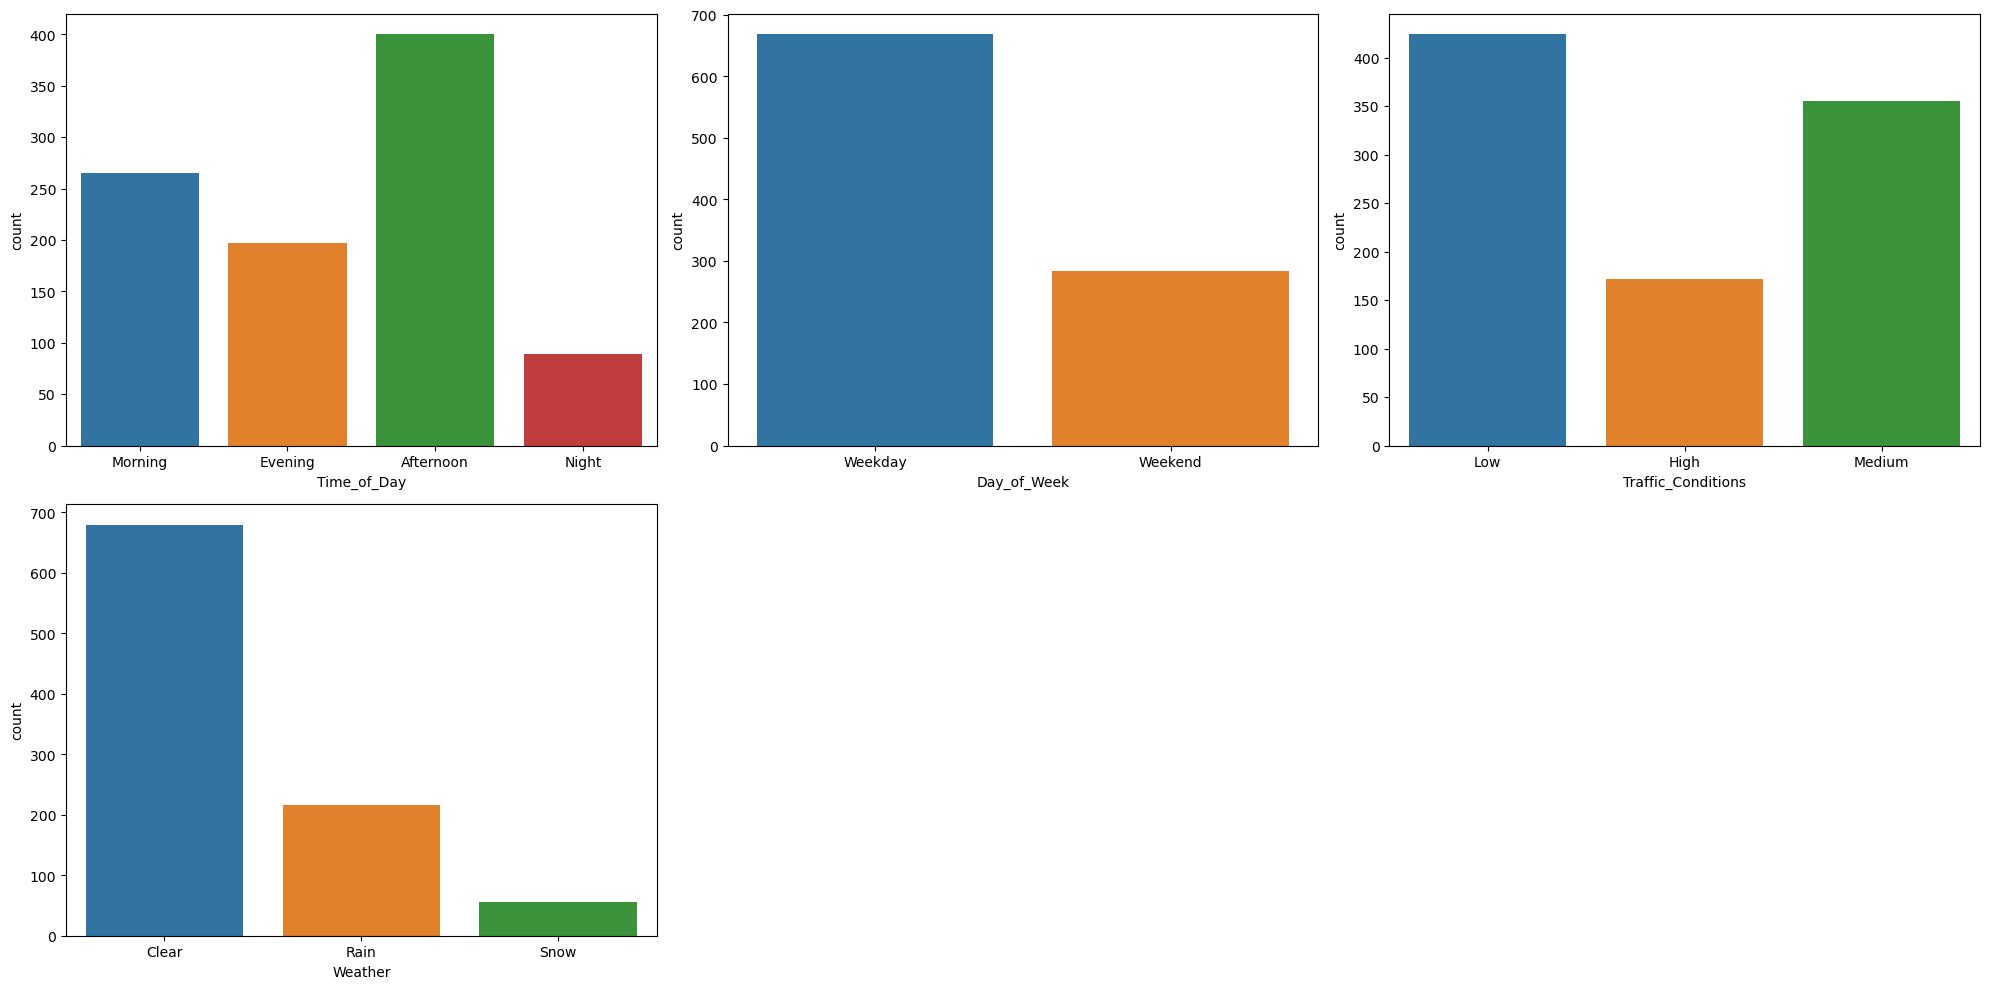

In [34]:
t=1
for i in cat:
    plt.subplot(2,3,t)
    sns.countplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

In [35]:
# Fetch the outliers


q1 = df[num].quantile(0.25)
q3 = df[num].quantile(0.75)


iqr = q3 - q1

lw = q1 - (1.5*iqr)
uw = q3 + (1.5*iqr)

In [36]:
out = df[((df[num]<lw)|(df[num]>uw)).any(axis=1)]

In [37]:
len(out)/len(df)*100

2.7339642481598316

## Bi variate analysis

#### Num vs Num (Target)
#### Cat vs Num (Target)


In [38]:
df[num].corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.041692,0.032499,-0.012835,-0.033366,-0.023411,0.841818
Passenger_Count,-0.041692,1.000000,0.024571,0.039461,0.038119,0.019513,-0.013172
Base_Fare,0.032499,0.024571,1.000000,0.001006,-0.017302,0.009452,0.035161
Per_Km_Rate,-0.012835,0.039461,0.001006,1.000000,0.024912,0.028195,0.263500
Per_Minute_Rate,-0.033366,0.038119,-0.017302,0.024912,1.000000,-0.022522,0.133910
Trip_Duration_Minutes,-0.023411,0.019513,0.009452,0.028195,-0.022522,1.000000,0.219380
Trip_Price,0.841818,-0.013172,0.035161,0.263500,0.133910,0.219380,1.000000


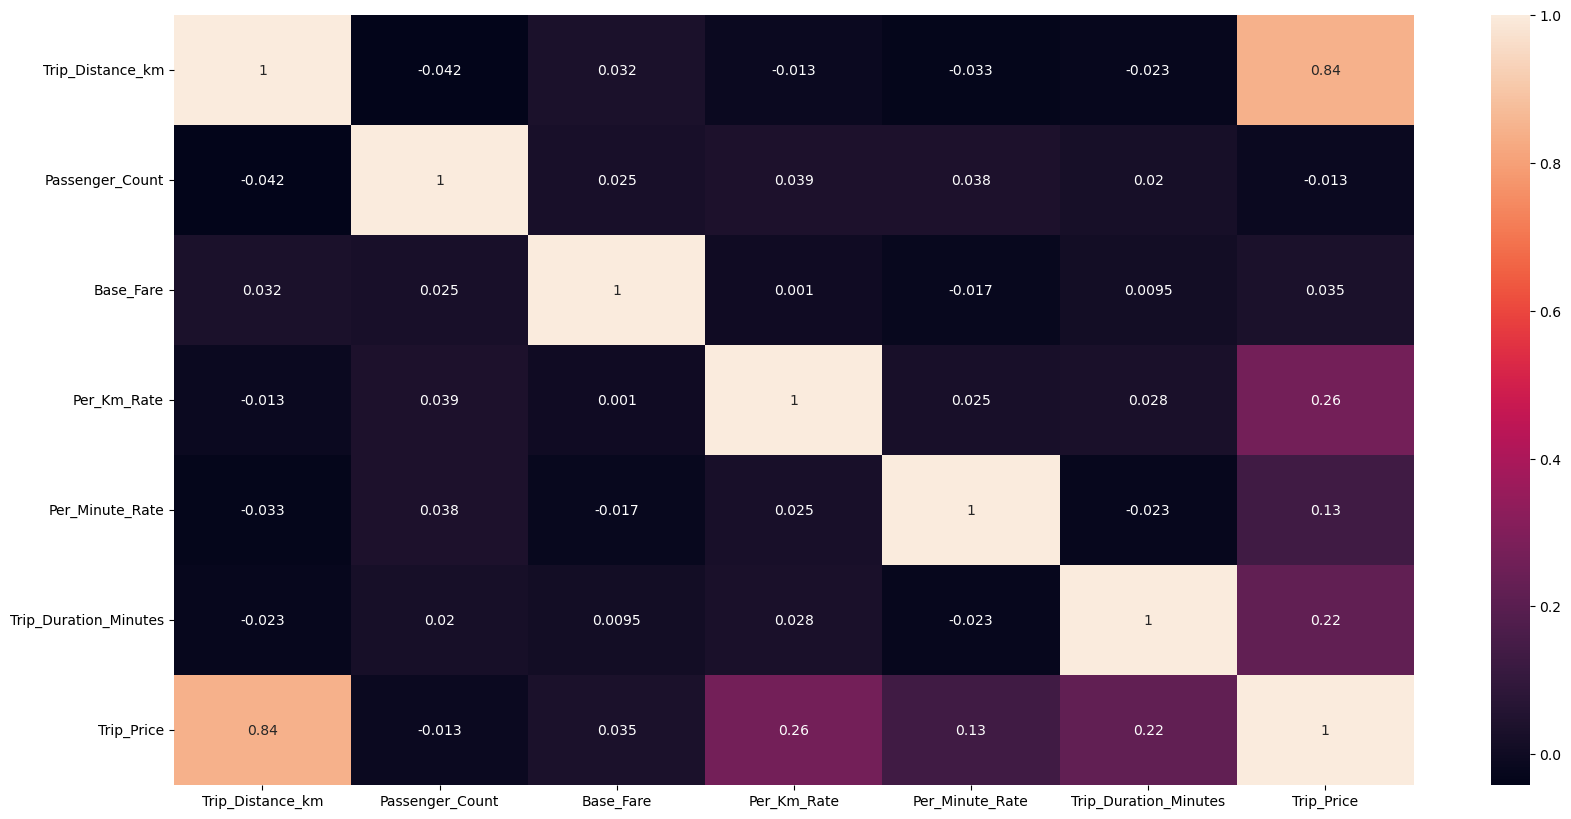

In [39]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

In [40]:
# scatter plot

In [41]:
#### Cat vs Num (Target) Compare mean ( barplot)

# Inferential stats

1. Num vs Target -> pearson R test
2. Target vs Cat(2 categories) -> T-Test independence
3. Target vs Cat(more than 2 categories) -> ANOVA

# Transformation

In [42]:
df[num].skew()

Trip_Distance_km         2.332909
Passenger_Count          0.080389
Base_Fare                0.003739
Per_Km_Rate              0.096660
Per_Minute_Rate          0.050730
Trip_Duration_Minutes    0.016349
Trip_Price               3.732561
dtype: float64

In [43]:
from sklearn.preprocessing import PowerTransformer

In [44]:
p = PowerTransformer(standardize=False)

In [45]:
df['Trip_Distance_km'] = p.fit_transform(df[['Trip_Distance_km']])

# Encoding

In [46]:
for i in cat:
    print(i)
    print(df[i].unique())

Time_of_Day
['Morning' 'Evening' 'Afternoon' 'Night']
Day_of_Week
['Weekday' 'Weekend']
Traffic_Conditions
['Low' 'High' 'Medium']
Weather
['Clear' 'Rain' 'Snow']


In [47]:
df['Traffic_Conditions'] = df['Traffic_Conditions'].replace({'Low':-1,'Medium':0, 'High':1})

In [48]:
df['Day_of_Week'] = df['Day_of_Week'].replace({'Weekday':1,'Weekend':0})

In [49]:
dff = pd.get_dummies(data = df, columns=['Time_of_Day','Weather'],
               drop_first=True,dtype=int )

In [50]:
dff

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Weather_Rain,Weather_Snow
0,5.292891,1,3.0,-1,3.56,0.80,0.32,53.82,36.2624,0,1,0,0,0
1,7.247926,0,1.0,1,2.70,1.21,0.15,37.27,52.9032,1,0,0,0,0
2,6.606228,1,4.0,-1,3.48,0.51,0.15,116.81,36.4698,1,0,0,0,0
3,6.116299,1,3.0,1,2.93,0.63,0.32,22.64,15.6180,1,0,0,0,0
4,3.433143,0,2.0,0,2.55,1.71,0.48,89.33,60.2028,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2.625866,0,4.0,0,2.39,0.62,0.49,58.39,34.4049,0,0,0,0,0
947,8.027923,1,4.0,0,3.12,0.61,0.29,61.96,62.1295,0,0,1,0,0
948,3.213130,1,3.0,-1,2.08,1.78,0.29,54.18,33.1236,0,1,0,1,0
949,8.155613,1,1.0,-1,2.67,0.82,0.17,114.94,61.2090,0,1,0,0,0


# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = dff.drop('Trip_Price',axis =1)
y = dff[['Trip_Price']]

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.3,random_state=42)

### Base Model

In [54]:
import statsmodels.api as sma

In [55]:
xtrain_c = sma.add_constant(xtrain)
xtest_c = sma.add_constant(xtest)

In [56]:
model1 = sma.OLS(ytrain,xtrain_c).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Trip_Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     32.50
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           7.25e-48
Time:                        12:00:50   Log-Likelihood:                -1285.7
No. Observations:                 285   AIC:                             2599.
Df Residuals:                     271   BIC:                             2651.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -76.8470     10.456     -7.350      0.000     -97.432     -56.262
Trip_Distance_km         11.7847      0.679     17.344      0.000      10.447      13.122
Day_of_Week               0.0251      2.877      0.009      0.993      -5.639       5.689
Passenger_Count           0.0887      1.269      0.070      0.944      -2.409       2.587
Traffic_Conditions        2.3035      1.934      1.191      0.235      -1.504       6.111
Base_Fare                -1.1048      1.675     -0.659      0.510      -4.403       2.194
Per_Km_Rate              28.2426      3.298      8.564      0.000      21.750      34.735
Per_Minute_Rate          54.8215     12.325      4.448      0.000      30.557      79.086
Trip_Duration_Minutes     0.3083      0.042      7.306      0.000       0.225       0.391
Time_of_Day_Evening      -3.6457      3.863     -0.944      0.346     -11.251       3.959
Time_of_Day_Morning       0.8961      3.280      0.273      0.785      -5.562       7.354
Time_of_Day_Night        -5.7524      4.570     -1.259      0.209     -14.749       3.244
Weather_Rain             -0.6921      3.330     -0.208      0.836      -7.248       5.864
Weather_Snow              2.2517      7.445      0.302      0.763     -12.406      16.909
==============================================================================
Omnibus:                      348.464   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22282.662
Skew:                           5.441   Prob(JB):                         0.00
Kurtosis:                      44.929   Cond. No.                         745.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
ypred1 = model1.predict(xtest_c)
ypred1

199     47.437523
420    101.162358
694      3.422667
750     53.034923
507     76.590320
          ...    
904     65.385568
262     61.320102
610     35.435284
297     58.882423
414     48.420216
Length: 666, dtype: float64

In [58]:
summary = pd.DataFrame(columns=['R-Squre','RMSE','MAPE'])
summary.index.name = 'Model Name'

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [60]:
def metric(model,ytest,ypred):
    
    r2 = r2_score(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    mape = mean_absolute_percentage_error(ytest,ypred)
    
    
    summary.loc[model] = [r2,rmse,mape]
    
    return summary
    
    

In [61]:
metric('OLS MODEL',ytest,ypred1)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.64972,25.118049,0.276618


In [62]:
## sklearn 

from sklearn.linear_model import LinearRegression

In [63]:
model2 = LinearRegression()

In [64]:
model2.fit(xtrain_c,ytrain)

LinearRegression()

In [65]:
ypred2 = model2.predict(xtest_c)

In [66]:
metric('SKLEARN - LR',ytest,ypred2)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.64972,25.118049,0.276618
SKLEARN - LR,0.64972,25.118049,0.276618


In [67]:
## decision tree model

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt = DecisionTreeRegressor(random_state=42)

In [70]:
model3 = dt.fit(xtrain,ytrain)

In [71]:
ypred3 = model3.predict(xtest)

In [72]:
metric('Decision Tree',ytest,ypred3)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086


In [73]:
## decision tree model -> Pre pruning

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
dt = DecisionTreeRegressor(max_depth=5,min_samples_split=3,random_state=42)

In [76]:
model4 = dt.fit(xtrain,ytrain)

In [77]:
ypred4 = model4.predict(xtest)

In [78]:
metric('Decision Tree - Pruning',ytest,ypred4)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721


In [79]:
## Random Forest 

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf = RandomForestRegressor(random_state=42)

In [82]:
model5 = rf.fit(xtrain,ytrain)

In [83]:
ypred_train = model5.predict(xtrain)

In [84]:
ypred5= model5.predict(xtest)

In [85]:
metric('Random Forest-train',ytrain,ypred_train)
metric('Random Forest-test',ytest,ypred5)


,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297


In [86]:
##Regularization

In [101]:
# ridge

In [87]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [97]:
rid = Ridge(alpha = 0.1,random_state=42)

In [98]:
model6 = rid.fit(xtrain,ytrain)

In [99]:
ypred6 = model6.predict(xtest)

In [100]:
metric('Ridge',ytest,ypred6)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297
Ridge,0.649526,25.125025,0.276193


In [101]:
# ridge

In [87]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [97]:
rid = Ridge(alpha = 0.1,random_state=42)

In [98]:
model6 = rid.fit(xtrain,ytrain)

In [99]:
ypred6 = model6.predict(xtest)

In [100]:
metric('Ridge',ytest,ypred6)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297
Ridge,0.649526,25.125025,0.276193


In [97]:
rid = Ridge(alpha = 0.1,random_state=42)

In [98]:
model6 = rid.fit(xtrain,ytrain)

In [99]:
ypred6 = model6.predict(xtest)

In [100]:
metric('Ridge',ytest,ypred6)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297
Ridge,0.649526,25.125025,0.276193


In [102]:
# LASSO

In [103]:
ls = Lasso(alpha=0.1, random_state=42)

In [104]:
model7 = ls.fit(xtrain,ytrain)

In [105]:
ypred7 = model7.predict(xtest)

In [106]:
metric('Lasso',ytest,ypred7)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297
Ridge,0.649526,25.125025,0.276193
Lasso,0.649208,25.136420,0.272365


In [107]:
# Random Forest is the best model with minimum error

In [108]:
# Boosting

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
gb = GradientBoostingRegressor(random_state=42)

In [112]:
model8 = gb.fit(xtrain,ytrain)

In [113]:
ypred8 = model8.predict(xtest)

In [114]:
metric('Gradient Boosting',ytest,ypred8)

,R-Squre,RMSE,MAPE
Model Name,,,
OLS MODEL,0.649720,25.118049,0.276618
SKLEARN - LR,0.649720,25.118049,0.276618
Decision Tree,0.855762,16.118248,0.227086
Decision Tree - Pruning,0.822099,17.900603,0.260721
Random Forest-train,0.979915,4.993826,0.058526
Random Forest-test,0.928728,11.330177,0.154297
Ridge,0.649526,25.125025,0.276193
Lasso,0.649208,25.136420,0.272365
Gradient Boosting,0.916369,12.273302,0.120225
